# Récupérez et explorez le corpus de textes

In [53]:
from urllib import request
import bs4
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
#help(bs4)

In [2]:
import nltk
#nltk.download('punkt')

## Récupération des textes

In [3]:
# Etape 2 : utiliser le package BeautifulSoup
# qui "comprend" les balises contenues dans la chaine de caractères renvoyée par la fonction request
def get_page(url):
    url_pokemon = url
    req = request.Request(url_pokemon, headers = {'User-Agent' : 'Mozilla/5.0'})
    html = request.urlopen(req).read()
    return bs4.BeautifulSoup(html, "lxml")

In [4]:
def get_chanson_texte(url):   
    page = get_page(url)
    texte = page.findChild('div', {'class': 'text-formatted'}).getText()
    return texte

In [5]:
texte = get_chanson_texte("https://culture.tv5monde.com/musique/paroles-de-chanson/pendant-24h-656365")
texte

"\n(L'ultime nuance vue de l'intérieur\nVivre cette chance pendant 24h) x2\nJ'enverrai un mail au taf en faisant les courses à Carrefour\nJ'aiderai les enfants aux devoirs en sortant la quiche du four\nAvec eux je serai joyeuse, avec mon mec, femme fatale\n24h dans la peau d'une femme, je comprendrai la charge mentale\nÀ 16h35 pile, j'arrêterai de travailler\nVu qu'après quand t'es une femme, eh ben t'es plus payée\nJe sortirai en jupe quelques instants dans les transports\nPour comprendre l'essence même du hashtag balance ton porc\n\xa0\nJ'boirai du whisky pour me mettre à l'aise\nSans coca sans glaçon comme les mecs balaises\nJ'irai draguer une fille mais y aura pas de malaise\nJ'enverrai pas de texto qui dit c'est quand qu'on baise\nJe serai romantique avec les meufs sur Tinder\nPas de dick pick, des cœurs de toutes les couleurs\nJ'irai marcher la nuit, je prendrai pas de Uber\nSi je croise un autre mec plus besoin d'avoir peur\nMais je veux aussi kiffer, connaître enfin leur vrai p

In [6]:
def get_datas(base_url, end_url):
    page = get_page(base_url+end_url)
    # récupérer la liste des noms de pokémon
    df = pd.DataFrame(columns=['titre','auteur','url', 'paroles'])
    for row in page.findAll('div', {'class': 'views-row'}) :
        try:
            temp = row.findChild('span', {'class': 'field-content'})
            temp2 = temp.findChild('a', {'hreflang': 'fr'})
            titre = temp2.getText().strip()
            url = temp2.get('href')
            # auteur 
            temp = row.findChild('div', {'class': "views-field views-field-field-chanteur"})
            auteur = temp.findChild('a').getText()
            auteur = auteur.strip()
            # paroles
            texte = get_chanson_texte(base_url+url)
            new_row = {'titre':titre, 'auteur':auteur, 'url':url, 'paroles':texte}
            df = df.append(new_row,ignore_index=True, verify_integrity=False)
        except:
            pass
    return df

In [7]:
df_site = get_datas('https://culture.tv5monde.com/', 'musique/paroles-de-chanson')

In [8]:
print(df_site.shape)

(16, 4)


In [9]:
df_site.head()

,titre,auteur,url,paroles
0,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...
1,L'ours,CHRISTOPHE MAÉ,/musique/paroles-de-chanson/l-ours-656330,"\nLaisse-moi seul, j'suis pas d'humeur\nJe sui..."
2,La rumeur,Calogero,/musique/paroles-de-chanson/la-rumeur-586723,\nElle passe d'un bruit qui court en Une des k...
3,A-France,Gael Faye,/musique/paroles-de-chanson/a-france-457568,"\nMon arrivée en France, y'a bien longtemps\nD..."
4,Respire,Gael Faye,/musique/paroles-de-chanson/respire-457567,"\nRespire, respire, respire, espère…\nEncore l..."


In [24]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

In [25]:
df_token = df_site.copy()

In [31]:
df_token.columns

Index(['titre', 'auteur', 'url', 'paroles'], dtype='object')

In [34]:
df_token["tokens"] = df_token['paroles'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [35]:
df_token["tokens"]

0     [l, ultime, nuance, vue, de, l, intérieur, viv...
1     [laisse, moi, seul, j, suis, pas, d, humeur, j...
2     [elle, passe, d, un, bruit, qui, court, en, un...
3     [mon, arrivée, en, france, y, a, bien, longtem...
4     [respire, respire, respire, espère, encore, l,...
5     [nouveau, jour, et, l, ennui, ne, m, a, jamais...
6     [il, est, lundi, maudit, matin, ce, que, je, f...
7     [tressé, dans, le, frisson, du, vent, sur, les...
8     [y, a, le, premier, amour, qui, sera, le, prem...
9     [ici, les, petites, ralph, lauren, en, austin,...
10    [avis, à, tous, les, terriens, le, corona, min...
11    [on, a, cassé, la, planète, il, est, où, le, s...
12    [ma, sœur, nous, avons, des, cœurs, siamois, e...
13    [je, t, ai, déjà, parlé, de, bordeaux, non, su...
14    [j, ai, commencé, par, instagram, c, était, co...
15    [j, ai, lancé, des, chevaux, à, l, assaut, des...
Name: tokens, dtype: object

In [37]:
df_token["stats"] = df_token['tokens'].apply(lambda x: len(x))
df_token["stats"]

0     426
1     274
2     228
3     669
4     437
5     158
6     338
7     129
8     332
9     212
10    263
11    304
12    274
13    841
14    265
15    131
Name: stats, dtype: int64

In [38]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
df_token["freq"] = df_token['tokens'].apply(lambda x: nltk.FreqDist(x))
df_token["freq"]

0     {'l': 8, 'ultime': 1, 'nuance': 1, 'vue': 1, '...
1     {'laisse': 4, 'moi': 6, 'seul': 4, 'j': 11, 's...
2     {'elle': 13, 'passe': 1, 'd': 1, 'un': 6, 'bru...
3     {'mon': 4, 'arrivée': 1, 'en': 5, 'france': 8,...
4     {'respire': 27, 'espère': 9, 'encore': 2, 'l':...
5     {'nouveau': 1, 'jour': 1, 'et': 5, 'l': 2, 'en...
6     {'il': 4, 'est': 7, 'lundi': 1, 'maudit': 1, '...
7     {'tressé': 1, 'dans': 1, 'le': 2, 'frisson': 1...
8     {'y': 7, 'a': 7, 'le': 15, 'premier': 4, 'amou...
9     {'ici': 20, 'les': 2, 'petites': 1, 'ralph': 1...
10    {'avis': 1, 'à': 6, 'tous': 2, 'les': 7, 'terr...
11    {'on': 4, 'a': 13, 'cassé': 2, 'la': 19, 'plan...
12    {'ma': 2, 'sœur': 1, 'nous': 4, 'avons': 2, 'd...
13    {'je': 6, 't': 1, 'ai': 21, 'déjà': 1, 'parlé'...
14    {'j': 9, 'ai': 7, 'commencé': 1, 'par': 1, 'in...
15    {'j': 9, 'ai': 8, 'lancé': 1, 'des': 12, 'chev...
Name: freq, dtype: object

In [41]:
print(df_token.shape)
print(df_token.columns)
df_token.head()

(16, 7)
Index(['titre', 'auteur', 'url', 'paroles', 'tokens', 'stats', 'freq'], dtype='object')


,titre,auteur,url,paroles,tokens,stats,freq
0,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,"[l, ultime, nuance, vue, de, l, intérieur, viv...",426,"{'l': 8, 'ultime': 1, 'nuance': 1, 'vue': 1, '..."
1,L'ours,CHRISTOPHE MAÉ,/musique/paroles-de-chanson/l-ours-656330,"\nLaisse-moi seul, j'suis pas d'humeur\nJe sui...","[laisse, moi, seul, j, suis, pas, d, humeur, j...",274,"{'laisse': 4, 'moi': 6, 'seul': 4, 'j': 11, 's..."
2,La rumeur,Calogero,/musique/paroles-de-chanson/la-rumeur-586723,\nElle passe d'un bruit qui court en Une des k...,"[elle, passe, d, un, bruit, qui, court, en, un...",228,"{'elle': 13, 'passe': 1, 'd': 1, 'un': 6, 'bru..."
3,A-France,Gael Faye,/musique/paroles-de-chanson/a-france-457568,"\nMon arrivée en France, y'a bien longtemps\nD...","[mon, arrivée, en, france, y, a, bien, longtem...",669,"{'mon': 4, 'arrivée': 1, 'en': 5, 'france': 8,..."
4,Respire,Gael Faye,/musique/paroles-de-chanson/respire-457567,"\nRespire, respire, respire, espère…\nEncore l...","[respire, respire, respire, espère, encore, l,...",437,"{'respire': 27, 'espère': 9, 'encore': 2, 'l':..."


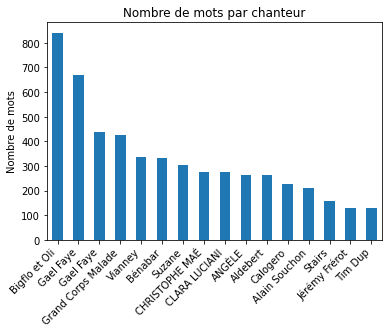

In [58]:
df_token = df_token.sort_values(by=["stats"], ascending=False)
df_token.plot(kind='bar', x="auteur", title='Nombre de mots par chanteur',legend=None)
plt.ylabel("Nombre de mots")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.show()


In [59]:
df_token.columns

Index(['titre', 'auteur', 'url', 'paroles', 'tokens', 'stats', 'freq'], dtype='object')

In [70]:
df_token["stats_unique"] = df_token.loc[:, :].apply(lambda x: {'total': len(x["tokens"]), 'unique': len(x["freq"].keys())}, axis=1)
df_token[["stats", "stats_unique"]]

,stats,stats_unique
13,841,"{'total': 841, 'unique': 352}"
3,669,"{'total': 669, 'unique': 294}"
4,437,"{'total': 437, 'unique': 175}"
0,426,"{'total': 426, 'unique': 244}"
6,338,"{'total': 338, 'unique': 73}"
8,332,"{'total': 332, 'unique': 158}"
11,304,"{'total': 304, 'unique': 141}"
1,274,"{'total': 274, 'unique': 144}"
12,274,"{'total': 274, 'unique': 96}"
14,265,"{'total': 265, 'unique': 116}"


In [72]:
df_token["stats_unique_word"] = df_token["freq"].apply(lambda x: len(x.keys()))
df_token[["stats", "stats_unique_word", "stats_unique"]]

,stats,stats_unique_word,stats_unique
13,841,352,"{'total': 841, 'unique': 352}"
3,669,294,"{'total': 669, 'unique': 294}"
4,437,175,"{'total': 437, 'unique': 175}"
0,426,244,"{'total': 426, 'unique': 244}"
6,338,73,"{'total': 338, 'unique': 73}"
8,332,158,"{'total': 332, 'unique': 158}"
11,304,141,"{'total': 304, 'unique': 141}"
1,274,144,"{'total': 274, 'unique': 144}"
12,274,96,"{'total': 274, 'unique': 96}"
14,265,116,"{'total': 265, 'unique': 116}"


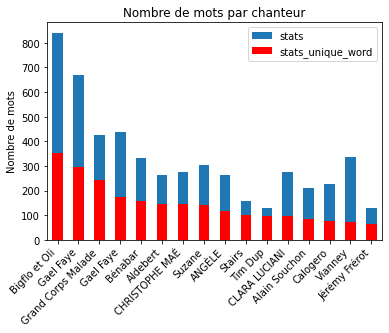

In [75]:
df_token = df_token.sort_values(by=["stats_unique_word", "stats"], ascending=False)
ax = df_token.plot(kind='bar', x="auteur", y="stats", title='Nombre de mots par chanteur')
df_token.plot(x="auteur", y="stats_unique_word", kind="bar", ax=ax, color="red")
plt.ylabel("Nombre de mots")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.show()

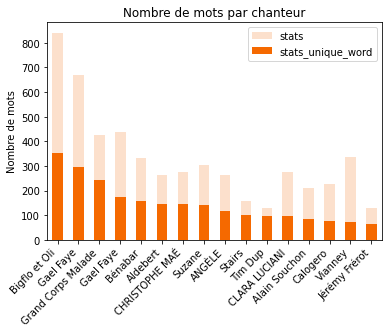

In [78]:
df_token = df_token.sort_values(by=["stats_unique_word", "stats"], ascending=False)
colors = ["#fce0cc", '#f56900']

ax = df_token.plot(kind='bar', x="auteur", y="stats", title='Nombre de mots par chanteur',stacked=True, color=colors[0])
df_token.plot(x="auteur", y="stats_unique_word", kind="bar", ax=ax,stacked=True, color=colors[1])
plt.ylabel("Nombre de mots")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.show()

## Première phase de nettoyage

### Stop Words

In [84]:
nltk.Counter(df_token['tokens']).most_common(200)

TypeError: unhashable type: 'list'

In [83]:
wd = pd.DataFrame(nltk.Counter(df_token['tokens']).most_common(200), columns=['word', 'frequency'])

TypeError: unhashable type: 'list'

In [80]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
freq_totale = nltk.Counter()

In [ ]:
df_token["freq"].apply(lambda x: len(x.keys()))

In [82]:
df_token["freq"].apply(lambda x: freq_totale += v for v in x.values(), axis=1)

SyntaxError: invalid syntax (Temp/ipykernel_33628/4021887486.py, line 1)

In [ ]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
freq_totale = nltk.Counter()
for k, v in corpora.iteritems():
    freq_totale += freq[k]

# Deuxièmement on décide manière un peu arbitraire du nombre de mots les plus fréquents à supprimer. On pourrait afficher un graphe d'évolution du nombre de mots pour se rendre compte et avoir une meilleure heuristique. 
most_freq = zip(*freq2.most_common(100))[0]

# On créé notre set de stopwords final qui cumule ainsi les 100 mots les plus fréquents du corpus ainsi que l'ensemble de stopwords par défaut présent dans la librairie NLTK
sw = set()
sw.update(stopwords)
sw.update(tuple(nltk.corpus.stopwords.words('french')))


In [ ]:
#{key: value for key, value in x}

In [ ]:
df_token["freq"].apply(lambda x: (for k, v in corpora.iteritems(): freq_totale += freq[k]))


# Deuxièmement on décide manière un peu arbitraire du nombre de mots les plus fréquents à supprimer.
# On pourrait afficher un graphe d'évolution du nombre de mots pour se rendre compte et avoir une meilleure heuristique. 
most_freq = zip(*freq2.most_common(100))[0]



# On créé notre set de stopwords final qui cumule ainsi les 100 mots les plus fréquents du corpus ainsi que l'ensemble de stopwords par défaut présent dans la librairie NLTK
sw = set()
sw.update(stopwords)
sw.update(tuple(nltk.corpus.stopwords.words('french')))


# ARCHIVES

In [43]:
just to fail

SyntaxError: invalid syntax (Temp/ipykernel_33628/693838000.py, line 1)

In [ ]:
df_2 = df_site.copy()

In [ ]:
df_2 = df_2["paroles"].str.split("\n", n=0, expand=True)
print(df_2.shape)
df_2.head()

(16, 82)


,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,,(L'ultime nuance vue de l'intérieur,Vivre cette chance pendant 24h) x2,J'enverrai un mail au taf en faisant les cours...,J'aiderai les enfants aux devoirs en sortant l...,"Avec eux je serai joyeuse, avec mon mec, femme...","24h dans la peau d'une femme, je comprendrai l...","À 16h35 pile, j'arrêterai de travailler","Vu qu'après quand t'es une femme, eh ben t'es ...",Je sortirai en jupe quelques instants dans les...,...,None,None,None,None,None,None,None,None,None,None
1,,"Laisse-moi seul, j'suis pas d'humeur",Je suis bouillant comme l'équateur,Posé sur quelques mètres carré,J'ai beau hurler mais,Y'a personne pour m'aider,"Laisse-moi seul, j'te dis, j'ai pas le cœur",La saison des amours se meurt,Je suis qu'un taulard à ciel ouvert,"Regarde, on dirait un clochard en mer",...,None,None,None,None,None,None,None,None,None,None
2,,Elle passe d'un bruit qui court en Une des kio...,Elle peut faire passer ton père pour un tox,Court et court et elle prend de l'ampleur,"Elle tourne autour de toi, la rumeur","Elle court de bouche en bouche, de porte en porte",Tu appuies sur une touche et elle s'exporte,Court et court et elle adore faire peur,"Elle te montre du doigt, la rumeur",La rumeur,...,None,None,None,None,None,None,None,None,None,None
3,,"Mon arrivée en France, y'a bien longtemps","Depuis que j'crois plus en l'ONU, depuis que j...",Maintenant j'ai vingt ans et quelques poussières,Et j'repense à l'Afrique où nous étions encore...,On a grandi là-bas au bord du lac Tanganyika,"Et moi je supporte ici, tant que là-bas y'aura...","Eh J-NO, Mucyo, Iris, Fabrice et les autres",Des potes comme vous j’vous assure j’en ai pas...,"Et puis y’a eu Paris, maintenant j’l’appelle «...",...,None,None,None,None,None,None,None,None,None,None
4,,"Respire, respire, respire, espère…","Encore l'insomnie, sonnerie du matin","Le corps engourdi, toujours endormi, miroir, s...","Triste face à face, angoisse du réveil","Reflet dans la glace, les années qui passent t...","Aux flashs d'infos : les crises, le chômage","la fonte des glaces, les particules fines","Courir après l'heure, les rames bondées","Les bastons d'regards, la vie c'est l'usine",...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df_2.describe(include="all")

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
count,16,16,16,16,16,16,16,16,16,16,...,1,1,1,1,1,1,1,1,1,1
unique,1,16,16,16,16,16,16,16,16,15,...,1,1,1,1,1,1,1,1,1,1
top,,(L'ultime nuance vue de l'intérieur,Vivre cette chance pendant 24h) x2,J'enverrai un mail au taf en faisant les cours...,J'aiderai les enfants aux devoirs en sortant l...,"Avec eux je serai joyeuse, avec mon mec, femme...","24h dans la peau d'une femme, je comprendrai l...","À 16h35 pile, j'arrêterai de travailler","Vu qu'après quand t'es une femme, eh ben t'es ...",,...,Ils te diront « C'est la plus belle ville du m...,Refrain (x2),Tu sais qu'à Nantes y a un éléphant mais genre...,"Et il avance et tout, genre il bouge dans la v...",Qu'est-ce tu dis frère ? Mais j'te jure qu’c'e...,C'est un éléphant (sûr ?) mais genre un robot ...,"Ah ouais ? putain, mais tu…","C'est un éléphant, mais un, un robot",,
freq,16,1,1,1,1,1,1,1,1,2,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
df_sentences = pd.concat([df_site, df_2], axis=1, join='inner')
print(df_sentences.shape)
df_sentences.head()

(16, 86)


,titre,auteur,url,paroles,0,1,2,3,4,5,...,72,73,74,75,76,77,78,79,80,81
0,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,,(L'ultime nuance vue de l'intérieur,Vivre cette chance pendant 24h) x2,J'enverrai un mail au taf en faisant les cours...,J'aiderai les enfants aux devoirs en sortant l...,"Avec eux je serai joyeuse, avec mon mec, femme...",...,None,None,None,None,None,None,None,None,None,None
1,L'ours,CHRISTOPHE MAÉ,/musique/paroles-de-chanson/l-ours-656330,"\nLaisse-moi seul, j'suis pas d'humeur\nJe sui...",,"Laisse-moi seul, j'suis pas d'humeur",Je suis bouillant comme l'équateur,Posé sur quelques mètres carré,J'ai beau hurler mais,Y'a personne pour m'aider,...,None,None,None,None,None,None,None,None,None,None
2,La rumeur,Calogero,/musique/paroles-de-chanson/la-rumeur-586723,\nElle passe d'un bruit qui court en Une des k...,,Elle passe d'un bruit qui court en Une des kio...,Elle peut faire passer ton père pour un tox,Court et court et elle prend de l'ampleur,"Elle tourne autour de toi, la rumeur","Elle court de bouche en bouche, de porte en porte",...,None,None,None,None,None,None,None,None,None,None
3,A-France,Gael Faye,/musique/paroles-de-chanson/a-france-457568,"\nMon arrivée en France, y'a bien longtemps\nD...",,"Mon arrivée en France, y'a bien longtemps","Depuis que j'crois plus en l'ONU, depuis que j...",Maintenant j'ai vingt ans et quelques poussières,Et j'repense à l'Afrique où nous étions encore...,On a grandi là-bas au bord du lac Tanganyika,...,None,None,None,None,None,None,None,None,None,None
4,Respire,Gael Faye,/musique/paroles-de-chanson/respire-457567,"\nRespire, respire, respire, espère…\nEncore l...",,"Respire, respire, respire, espère…","Encore l'insomnie, sonnerie du matin","Le corps engourdi, toujours endormi, miroir, s...","Triste face à face, angoisse du réveil","Reflet dans la glace, les années qui passent t...",...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df_sentences = df_sentences.drop(columns=[0])
df_sentences.columns

Index([  'titre',  'auteur',     'url', 'paroles',         1,         2,
               3,         4,         5,         6,         7,         8,
               9,        10,        11,        12,        13,        14,
              15,        16,        17,        18,        19,        20,
              21,        22,        23,        24,        25,        26,
              27,        28,        29,        30,        31,        32,
              33,        34,        35,        36,        37,        38,
              39,        40,        41,        42,        43,        44,
              45,        46,        47,        48,        49,        50,
              51,        52,        53,        54,        55,        56,
              57,        58,        59,        60,        61,        62,
              63,        64,        65,        66,        67,        68,
              69,        70,        71,        72,        73,        74,
              75,        76,        77,        78, 

In [ ]:
df_transpose = df_sentences.melt(id_vars=['titre',  'auteur', 'url', 'paroles'], 
        var_name="order", 
        value_name="sentence")
print(df_transpose.shape)
df_transpose.head()

(1296, 6)


,titre,auteur,url,paroles,order,sentence
0,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,1,(L'ultime nuance vue de l'intérieur
1,L'ours,CHRISTOPHE MAÉ,/musique/paroles-de-chanson/l-ours-656330,"\nLaisse-moi seul, j'suis pas d'humeur\nJe sui...",1,"Laisse-moi seul, j'suis pas d'humeur"
2,La rumeur,Calogero,/musique/paroles-de-chanson/la-rumeur-586723,\nElle passe d'un bruit qui court en Une des k...,1,Elle passe d'un bruit qui court en Une des kio...
3,A-France,Gael Faye,/musique/paroles-de-chanson/a-france-457568,"\nMon arrivée en France, y'a bien longtemps\nD...",1,"Mon arrivée en France, y'a bien longtemps"
4,Respire,Gael Faye,/musique/paroles-de-chanson/respire-457567,"\nRespire, respire, respire, espère…\nEncore l...",1,"Respire, respire, respire, espère…"


In [ ]:
df_transpose[df_transpose["titre"]=="Pendant 24h"]

,titre,auteur,url,paroles,order,sentence
0,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,1,(L'ultime nuance vue de l'intérieur
16,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,2,Vivre cette chance pendant 24h) x2
32,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,3,J'enverrai un mail au taf en faisant les cours...
48,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,4,J'aiderai les enfants aux devoirs en sortant l...
64,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,5,"Avec eux je serai joyeuse, avec mon mec, femme..."
...,...,...,...,...,...,...
1216,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,77,None
1232,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,78,None
1248,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,79,None
1264,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,80,None


In [ ]:
df_transpose["sentence"].isnull().sum()

588

In [ ]:
df_clean = df_transpose[~df_transpose["sentence"].isnull()]
print(df_clean.shape)
df_clean[df_clean["titre"]=="Pendant 24h"]

(708, 6)


,titre,auteur,url,paroles,order,sentence
0,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,1,(L'ultime nuance vue de l'intérieur
16,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,2,Vivre cette chance pendant 24h) x2
32,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,3,J'enverrai un mail au taf en faisant les cours...
48,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,4,J'aiderai les enfants aux devoirs en sortant l...
64,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,5,"Avec eux je serai joyeuse, avec mon mec, femme..."
80,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,6,"24h dans la peau d'une femme, je comprendrai l..."
96,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,7,"À 16h35 pile, j'arrêterai de travailler"
112,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,8,"Vu qu'après quand t'es une femme, eh ben t'es ..."
128,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,9,Je sortirai en jupe quelques instants dans les...
144,Pendant 24h,Grand Corps Malade,/musique/paroles-de-chanson/pendant-24h-656365,\n(L'ultime nuance vue de l'intérieur\nVivre c...,10,Pour comprendre l'essence même du hashtag bala...


In [ ]:
df_clean.columns

Index(['titre', 'auteur', 'url', 'paroles', 'order', 'sentence'], dtype='object')

In [ ]:
df_clean = df_clean[['titre', 'auteur', 'order', 'sentence']]
print(df_clean.shape)
df_clean[df_clean["titre"]=="Pendant 24h"]

(708, 4)


,titre,auteur,order,sentence
0,Pendant 24h,Grand Corps Malade,1,(L'ultime nuance vue de l'intérieur
16,Pendant 24h,Grand Corps Malade,2,Vivre cette chance pendant 24h) x2
32,Pendant 24h,Grand Corps Malade,3,J'enverrai un mail au taf en faisant les cours...
48,Pendant 24h,Grand Corps Malade,4,J'aiderai les enfants aux devoirs en sortant l...
64,Pendant 24h,Grand Corps Malade,5,"Avec eux je serai joyeuse, avec mon mec, femme..."
80,Pendant 24h,Grand Corps Malade,6,"24h dans la peau d'une femme, je comprendrai l..."
96,Pendant 24h,Grand Corps Malade,7,"À 16h35 pile, j'arrêterai de travailler"
112,Pendant 24h,Grand Corps Malade,8,"Vu qu'après quand t'es une femme, eh ben t'es ..."
128,Pendant 24h,Grand Corps Malade,9,Je sortirai en jupe quelques instants dans les...
144,Pendant 24h,Grand Corps Malade,10,Pour comprendre l'essence même du hashtag bala...


In [ ]:
df_clean["sentence"] = df_clean["sentence"].str.strip()
df_clean2 = df_clean.copy()

In [ ]:

df_clean2 = df_clean2[df_clean2["sentence"].str.len()>0]
print(df_clean2.shape)
df_clean2[df_clean2["titre"]=="Pendant 24h"]

(684, 4)


,titre,auteur,order,sentence
0,Pendant 24h,Grand Corps Malade,1,(L'ultime nuance vue de l'intérieur
16,Pendant 24h,Grand Corps Malade,2,Vivre cette chance pendant 24h) x2
32,Pendant 24h,Grand Corps Malade,3,J'enverrai un mail au taf en faisant les cours...
48,Pendant 24h,Grand Corps Malade,4,J'aiderai les enfants aux devoirs en sortant l...
64,Pendant 24h,Grand Corps Malade,5,"Avec eux je serai joyeuse, avec mon mec, femme..."
80,Pendant 24h,Grand Corps Malade,6,"24h dans la peau d'une femme, je comprendrai l..."
96,Pendant 24h,Grand Corps Malade,7,"À 16h35 pile, j'arrêterai de travailler"
112,Pendant 24h,Grand Corps Malade,8,"Vu qu'après quand t'es une femme, eh ben t'es ..."
128,Pendant 24h,Grand Corps Malade,9,Je sortirai en jupe quelques instants dans les...
144,Pendant 24h,Grand Corps Malade,10,Pour comprendre l'essence même du hashtag bala...


In [ ]:
test = "Bonjour, je suis un texte d'exemple pour le cours d'Openclassrooms. Soyez attentifs à ce cours !"

#nltk.word_tokenize(test, language="french")
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokenizer.tokenize(test)

['Bonjour',
 'je',
 'suis',
 'un',
 'texte',
 'd',
 'exemple',
 'pour',
 'le',
 'cours',
 'd',
 'Openclassrooms',
 'Soyez',
 'attentifs',
 'à',
 'ce',
 'cours']